# Performance Analysis

In this part of the report we are going to talk about the performance of our models, limited though the results that we achieved may be.

# R-Squared

We have mentioned in the previous section briefly about R-squared values. The main conclusion that we have been able to draw is that the non-trivial model, when trained correctly, is a great increase in performance over the baseline model. There is a significant increase in the value of the R-squared variable. This makes sense as we would hope that such a complex and multiply iterated process would perform better than a simple mean imputation, that takes a manner of seconds.

# Variable comparison

Here we are going to conduct a simple method, where we subtract our imputed values in a column from the true data, and then take the mean of the column to see the average variance in data from the truth and then taking a mean of this new column vector to get an impression of how much it differs from the actual data. We will import the data and then do data manipulation to achieve these results.

In [1]:
library(lubridate)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [2]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/test_complete1.csv.gz",temp2)
datacomplete <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "3.76S"


In [3]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/amelia_predict_3.csv",temp2)
dataamelia <- read.csv(temp2)
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "7.67S"


In [4]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/Mean_impute_fill.csv.gz",temp2)
datamean <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "3.25S"


In [5]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/output_missforest.csv.gz",temp2)
dataforest <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "1.22S"


In [6]:
nrow(datamean)
nrow(datacomplete)
nrow(dataamelia)
nrow(dataforest)

[1] 194980

[1] 194980

[1] 194980

[1] 194980

In [7]:
datacomplete[,"logduration"]=log(datacomplete[,"duration"])
head(datacomplete)
head(dataamelia)
head(datamean)
dataforest[,"logduration"]=log(dataforest[,"duration"])
head(dataforest)

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,logduration
,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,1331915797,192.168.202.102,2633,192.168.23.202,80,tcp,http,0.03,481,8133,RSTO,0,ShADadfR,8,813,9,8505,-3.506558
2,1331921224,192.168.202.102,4094,192.168.24.101,80,tcp,,0.01,7085,172,RSTO,0,ShADadfR,10,7497,9,544,-4.605170
3,1331903910,192.168.202.110,16066,192.168.27.152,12486,tcp,,0.01,0,0,REJ,0,Sr,1,48,1,40,-4.605170
4,1331988939,192.168.204.45,42997,192.168.23.1,28745,tcp,,0.01,0,0,REJ,0,Sr,1,60,1,40,-4.605170
5,1331918792,192.168.202.110,38566,192.168.229.252,32754,tcp,,0.20,0,0,REJ,0,Sr,1,48,1,40,-1.609438
6,1331901863,192.168.202.79,63805,192.168.229.252,45078,tcp,,0.06,0,0,REJ,0,Sr,1,44,1,40,-2.813411


,X,ts,orig_port,resp_port,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,logduration
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,1331915797,2633,80,-11.468966,-952483.2,8172.7190,8,813,9,8505,-2.7361080
2,2,1331921224,4094,80,0.010000,7085.0,172.0000,10,7497,9,544,-4.6051702
3,3,1331903910,16066,12486,35.346244,-5688781.5,-747.6270,1,48,1,40,-4.1732967
4,4,1331988939,42997,28745,9.635934,11816006.4,-299.4441,1,60,1,40,-0.8505876
5,5,1331918792,38566,32754,-7.491613,1549102.1,-36.9680,1,48,1,40,-4.1641293
6,6,1331901863,63805,45078,-12.463868,7241565.8,362.8646,1,44,1,40,-3.1555827


,ts,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,logduration
,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,1331915797,192.168.202.102,2633,192.168.23.202,80,tcp,http,1.419635,356075.8,1679.826,RSTO,0,ShADadfR,8,813,9,8505,-3.156832
2,1331921224,192.168.202.102,4094,192.168.24.101,80,tcp,,0.010000,7085.0,172.000,RSTO,0,ShADadfR,10,7497,9,544,-4.605170
3,1331903910,192.168.202.110,16066,192.168.27.152,12486,tcp,,1.419635,356075.8,1679.826,REJ,0,Sr,1,48,1,40,-3.156832
4,1331988939,192.168.204.45,42997,192.168.23.1,28745,tcp,,1.419635,356075.8,1679.826,REJ,0,Sr,1,60,1,40,-3.156832
5,1331918792,192.168.202.110,38566,192.168.229.252,32754,tcp,,1.419635,356075.8,1679.826,REJ,0,Sr,1,48,1,40,-3.156832
6,1331901863,192.168.202.79,63805,192.168.229.252,45078,tcp,,1.419635,356075.8,1679.826,REJ,0,Sr,1,44,1,40,-3.156832


,duration,orig_bytes,resp_bytes,logduration
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02081250,4.80831e+02,8133,-3.87220151
2,0.01000000,7.08500e+03,172,-4.60517019
3,1.01061582,1.99191e-04,0,0.01055987
4,0.01291319,1.99191e-04,0,-4.34950609
5,0.17636876,1.99191e-04,0,-1.73517827
6,0.02720282,1.99191e-04,0,-3.60443473


In [8]:
amelia_compld <- round(datacomplete$logduration, digits = 4) - round(dataamelia$logduration, digits = 4)
amelia_compld <- as.data.frame(amelia_compld,row.names=NULL)
head(amelia_compld,20)
mean(amelia_compld$amelia_compld)

,amelia_compld
,<dbl>
1,-0.7705
2,0.0000
3,-0.4319
4,-3.7546
5,2.5547
6,0.3422
7,-2.1050
8,2.6543
9,-0.4122


[1] -0.157021

In [9]:
mean_compld <- round(datacomplete$logduration, digits = 4) - round(datamean$logduration, digits = 4)
mean_compld <- as.data.frame(mean_compld,row.names=NULL)
head(mean_compld,20)
mean(mean_compld$mean_compld)

,mean_compld
,<dbl>
1,-0.3498
2,0.0000
3,-1.4484
4,-1.4484
5,1.5474
6,0.3434
7,0.9495
8,3.2790
9,1.8475


[1] -0.009686403

In [10]:
forest_compld <- round(datacomplete$logduration, digits = 4) - round(dataforest$logduration, digits = 4)
forest_compld <- as.data.frame(forest_compld,row.names=NULL)
head(forest_compld,20)
mean(forest_compld$forest_compld)

,forest_compld
,<dbl>
1,0.3656
2,0.0000
3,-4.6158
4,-0.2557
5,0.1258
6,0.7910
7,1.7621
8,1.8972
9,-1.3755


[1] -0.4991311

We have mostly decided to focus on `logduration` as simple by eye analysis of some of the data shows that our predicted bytes columns are off by a long shot as detailed below:

In [11]:
head(as.data.frame(dataamelia$orig_bytes))
head(as.data.frame(datacomplete$orig_bytes))
head(as.data.frame(datamean$orig_bytes))
head(as.data.frame(round(dataforest$orig_bytes,digits=4)))

,dataamelia$orig_bytes
,<dbl>
1,-952483.2
2,7085.0
3,-5688781.5
4,11816006.4
5,1549102.1
6,7241565.8


,datacomplete$orig_bytes
,<dbl>
1,481
2,7085
3,0
4,0
5,0
6,0


,datamean$orig_bytes
,<dbl>
1,356075.8
2,7085.0
3,356075.8
4,356075.8
5,356075.8
6,356075.8


,"round(dataforest$orig_bytes, digits = 4)"
,<dbl>
1,480.8310
2,7085.0000
3,0.0002
4,0.0002
5,0.0002
6,0.0002


The prevalence of this problem in the mean case as well shows that it would seem that our data is being greatly skewed by outliers that drag the bytes imputations into creating bad conclusions that massively bias the results.

We do however notice that the only method that seems to successfully even get close to predicting these values accurately is the non-trivial method of the random forest imputation. However for comparison with the others, we will still focus on `logduration`.

Below we plot a histogram of our logduration variables in order to achieve a visual representation of what each method's imputation has arrived at.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"22 y values <= 0 omitted from logarithmic plot"


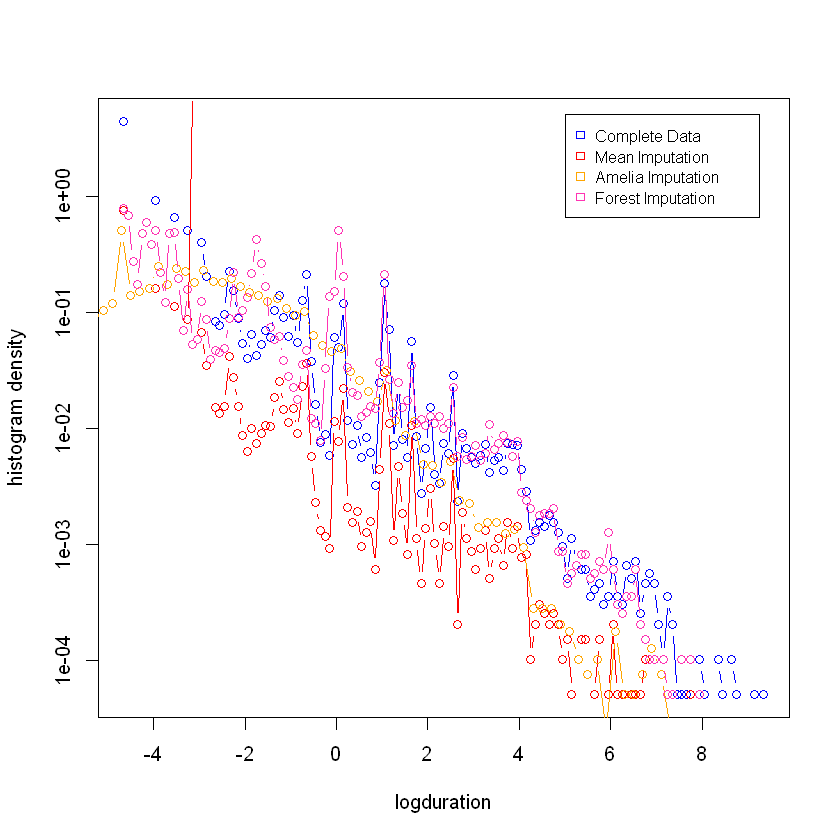

In [12]:
nbreaks=101 
thist=hist(datacomplete[,"logduration"],breaks=nbreaks,plot=FALSE)
thist1=hist(datamean[,"logduration"],breaks=nbreaks,plot=FALSE)
thist2=hist(dataamelia[,"logduration"],breaks=100000,plot=FALSE)
thist3=hist(dataforest[,"logduration"],breaks=nbreaks,plot=FALSE)

plot(thist$mids,thist$density,log="y",type="b",
     xlab="logduration",ylab="histogram density",col = "blue")
points(thist1$mids,thist1$density,col = "red",type="b")
points(thist2$mids,thist2$density,col = "orange",type="b")
points(thist3$mids,thist3$density,col = "maroon1",type="b")
legend(5, 5, legend=c("Complete Data", "Mean Imputation", "Amelia Imputation","Forest Imputation"),
       col=c("blue", "red", "orange","maroon1"),pch=0, cex=0.8)

In blue we see the complete original data distribution plotted. by observation we can see that in general the imputed plots to follow this same distribution, meaning that they all have some relatively good degree of accuracy to the truth. The worst is (as predicted) the mean imputation, as the distribution is more equally spread across the dataset (due to is being the mean). The mean imputation also has one extremely high jump (going off of the plot) which we can infer is the mean value, as this will obviously have a massively skewed distribution in the data.

We see that imputation from the amelia package follows a similar shape to the complete data, albeit appearing slightly lower on the graph, and following a much stricter linear structure, with very few jumps, this is probably down to the method of imputation, which assumes a normal distribution.

As expected we see that the best functioning, non-trivial random forest imputation performs the best here as well, sticking extremeley closely to the original distribution, only seemingly falling off towards the lower `logduration` values. Above 0 the correlation is incredibly (almost unbelievably in our opinion) accurate to the true data.

## Final thoughts

From all this various data we have found that our methods of imputation are more accurate than first percieved, at least for `logduration`. The plot at the end is a very nice representation and good way of observing the data and drawing conclusions. 

In comparison the more basic metric of comparing the mean of differences is not particularly useful as we see that in the mean imputation's case we get a very small value, which would suggest there's not much variance in the results, however we know better, and that this is easiliy the worst method out of all those used. Therefore this metric is not particularly useful and we will probably not attempt to use it in future projects; though the comparison between variables in this method was interesting, but would be time consuming to compare all of the thousands of results.